In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display 


In [2]:
np.random.seed(0)

time_step = .01
time_vec = np.arange(0, 70, time_step)

# A signal with a small frequency chirp
samples = np.sin(0.5 * np.pi * time_vec * (1 + .1 * time_vec))

In [11]:
sample_rate = 7000

In [12]:
len(samples)

7000

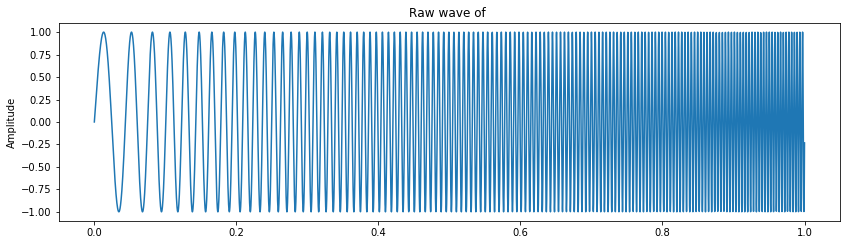

In [13]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' )
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

Text(0.5, 0, 'Seconds')

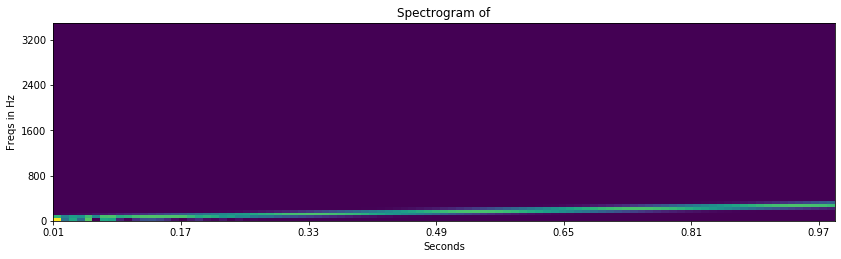

In [16]:
# 스펙트로그램을 계산하는 함수
def specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, spec.T.astype(np.float32)

# 스펙트로그램을 시각화한다
freqs, times, spectrogram = specgram(samples, sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax1.set_yticks(freqs[::16])
ax1.set_xticks(times[::16])
ax1.set_title('Spectrogram of' )
ax1.set_ylabel('Freqs in Hz')
ax1.set_xlabel('Seconds')

Text(0.5, 0, 'Seconds')

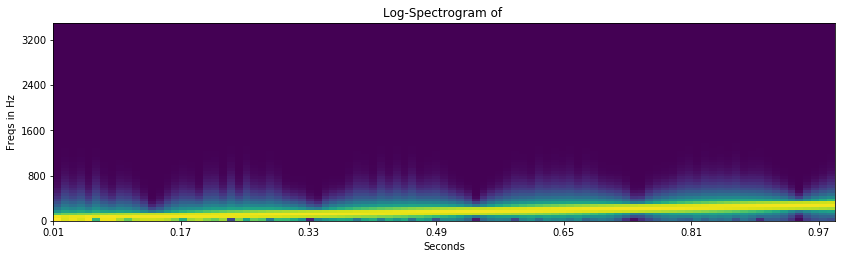

In [17]:
# log-스펙트로그램을 계산하는 함수
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

# log-스펙트로그램을 시각화한다
freqs, times, log_spectrogram = log_specgram(samples, sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(log_spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax1.set_yticks(freqs[::16])
ax1.set_xticks(times[::16])
ax1.set_title('Log-Spectrogram of ')
ax1.set_ylabel('Freqs in Hz')
ax1.set_xlabel('Seconds')

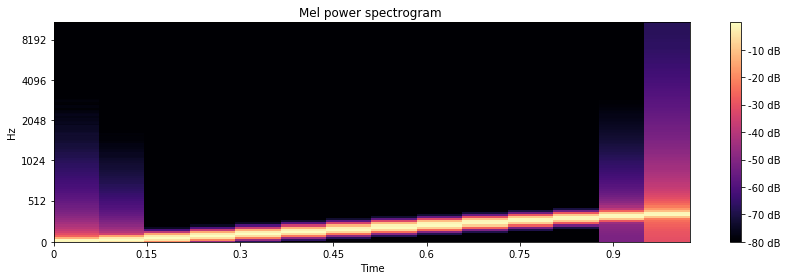

In [18]:
# mel-스펙트로그램을 계산하는 함수
S = librosa.feature.melspectrogram(samples.astype(np.float16), sr=sample_rate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

# mel-스펙트로그램을 시각화한다
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

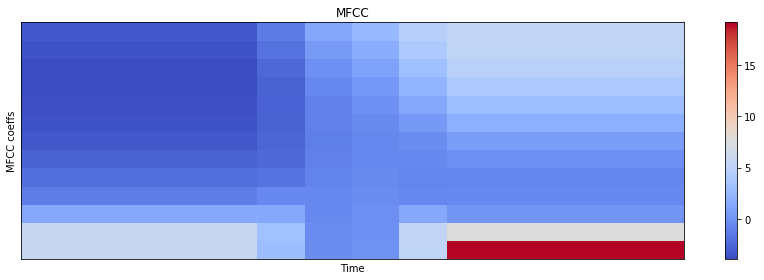

In [19]:
# MFCC를 계산하는 함수
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# MFCC를 시각화한다
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [20]:
import numpy as np
from scipy.fftpack import fft

In [21]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])
    return xf, vals


In [22]:
x, val = custom_fft(samples, sample_rate)

In [24]:
fft_all = np.array(val)

In [25]:
fft_all = (fft_all - np.mean(fft_all, axis=0)) / np.std(fft_all, axis=0)


In [28]:
fft_all

array([ 0.71400205,  0.7165727 ,  0.72432558, ..., -0.29267911,
       -0.29267912, -0.29267912])

In [29]:
# from sklearn.decomposition import PCA

# # PCA를 통해 2차원으로 축소한다
# pca = PCA(n_components=2)
# fft_all = pca.fit_transform(fft_all)

# # 축소된 데이터를 시각화한다
# plt.scatter(x=fft_all[:,0], y=fft_all[:,1], alpha=0.3)